In [1]:
from dataloader import load_data_one_hot_encoded
from trainer import train_model, evaluate_model
from snn import SNNModelSimple
import torch
import matplotlib.pyplot as plt
import pickle

In [2]:
root_folder = "./tactile_dataset/"
file_name = "final_merged_df_sw500.csv"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

train_losses_l = {}
train_accuracies_l = {}
val_losses_l = {}
val_accuracies_l = {}
test_accuracies_l = {}

for lr in [1e-4, 1e-3, 5e-3, 1e-2, 5e-2]:
    print(f"Training for lr={lr}")
    train_loader, val_loader, test_loader, num_outputs, num_features = load_data_one_hot_encoded(root_folder, file_name, spike_encoding='temporal', num_steps=50, batch_size=128, device=device)

    model = SNNModelSimple(num_features, num_outputs)
    model.to(device)
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    train_losses, train_accuracies, val_losses, val_accuracies = train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=10)
    train_losses_l[lr] = train_losses
    train_accuracies_l[lr] = train_accuracies
    val_losses_l[lr] = val_losses
    val_accuracies_l[lr] = val_accuracies

    test_accuracies_l[lr] = evaluate_model(model, test_loader,encoding='one-hot')

out_file_name = 'exp3_temporal_lr_1e-4_5e-2_t_50_bs_128_ep_10_temporal_mse.pkl'
with open(out_file_name, 'wb') as f:
    pickle.dump({"train_losses": train_losses_l, "train_accuracies": train_accuracies_l, "val_losses": val_losses_l, "val_accuracies": val_accuracies_l, "test_accuracies": test_accuracies_l}, f)


cpu
Training for lr=0.0001
Epoch 1/10, Train Loss: 0.0785, Train Accuracy: 8.80%, Val Loss: 17.3109, Val Accuracy: 9.40%, Time: 25.96s
Epoch 2/10, Train Loss: 0.0763, Train Accuracy: 9.52%, Val Loss: 17.0955, Val Accuracy: 11.39%, Time: 23.63s
Epoch 3/10, Train Loss: 0.0762, Train Accuracy: 11.35%, Val Loss: 17.3539, Val Accuracy: 11.83%, Time: 23.89s
Epoch 4/10, Train Loss: 0.0757, Train Accuracy: 13.63%, Val Loss: 17.3904, Val Accuracy: 16.47%, Time: 25.40s
Epoch 5/10, Train Loss: 0.0749, Train Accuracy: 20.53%, Val Loss: 18.8343, Val Accuracy: 23.70%, Time: 27.88s
Epoch 6/10, Train Loss: 0.0739, Train Accuracy: 24.01%, Val Loss: 21.4265, Val Accuracy: 25.04%, Time: 25.47s
Epoch 7/10, Train Loss: 0.0731, Train Accuracy: 25.34%, Val Loss: 22.0656, Val Accuracy: 26.06%, Time: 23.41s
Epoch 8/10, Train Loss: 0.0724, Train Accuracy: 26.12%, Val Loss: 24.7815, Val Accuracy: 27.12%, Time: 23.36s
Epoch 9/10, Train Loss: 0.0719, Train Accuracy: 26.09%, Val Loss: 25.2452, Val Accuracy: 26.22%,

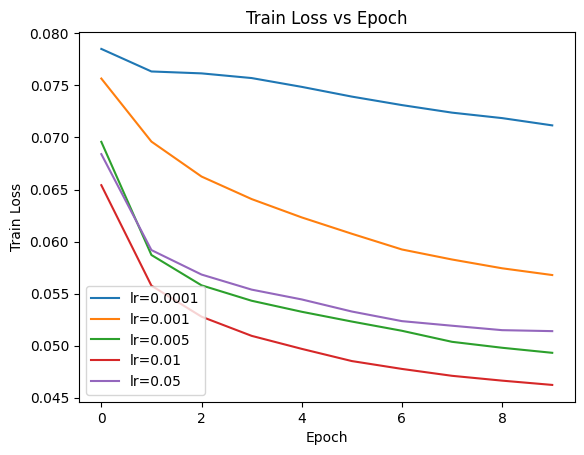

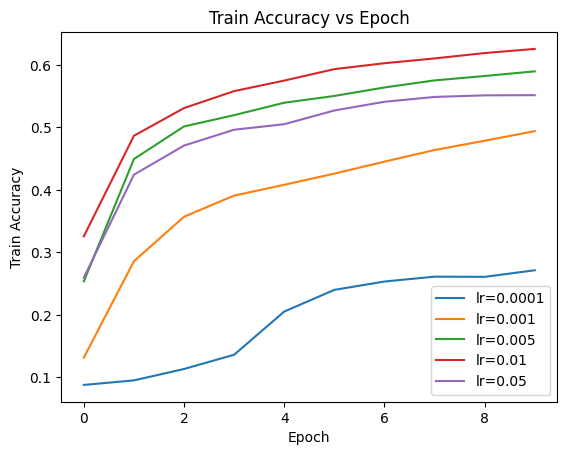

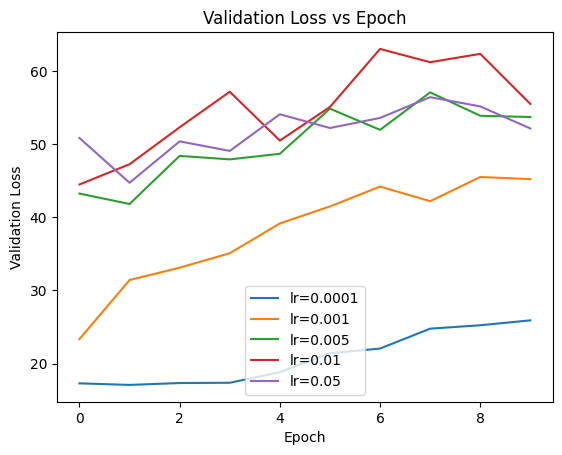

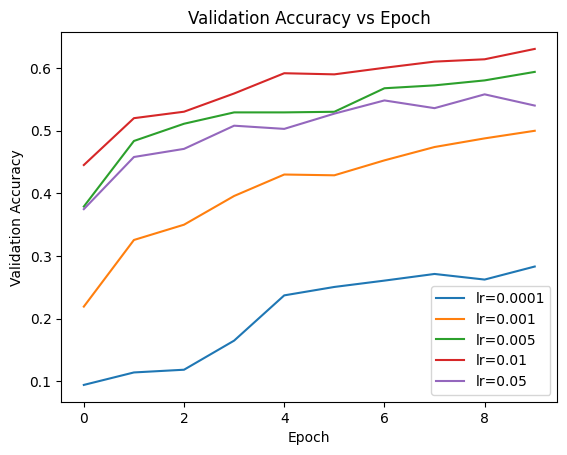

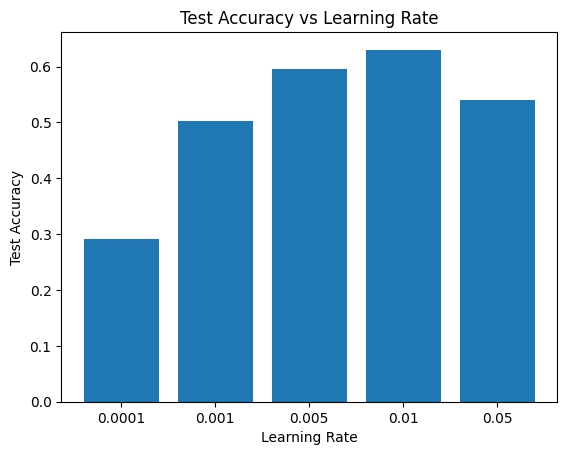

In [3]:
# Plotting
plt.figure()
for lr in train_losses_l.keys():
    plt.plot(train_losses_l[lr], label=f"lr={lr}")
    plt.xlabel("Epoch")
    plt.ylabel("Train Loss")
    plt.legend()
    plt.title("Train Loss vs Epoch")

plt.figure()
for lr in train_accuracies_l.keys():
    plt.plot(train_accuracies_l[lr], label=f"lr={lr}")
    plt.xlabel("Epoch")
    plt.ylabel("Train Accuracy")
    plt.legend()
    plt.title("Train Accuracy vs Epoch")

plt.figure()
for lr in val_losses_l.keys():
    plt.plot(val_losses_l[lr], label=f"lr={lr}")
    plt.xlabel("Epoch")
    plt.ylabel("Validation Loss")
    plt.legend()
    plt.title("Validation Loss vs Epoch")

plt.figure()
for lr in val_accuracies_l.keys():
    plt.plot(val_accuracies_l[lr], label=f"lr={lr}")
    plt.xlabel("Epoch")
    plt.ylabel("Validation Accuracy")
    plt.legend()
    plt.title("Validation Accuracy vs Epoch")

plt.figure()
plt.bar([str(x) for x in test_accuracies_l.keys()], test_accuracies_l.values())
plt.xlabel("Learning Rate")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs Learning Rate")
plt.show()
